In [1]:
import pandas as pd
import re

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# from scipy.sparse import hstack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('Data/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [4]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skill Programming Language P thon panda ...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Detail Ma 2013 to Ma 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Area of Intere t Deep Learning Control S te...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skill R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Detail MCA YMCAUST Faridabad...


In [5]:
df.Category.value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Blockchain                   40
Data Science                 40
Operations Manager           40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64

In [6]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('e', 564), ('Detail', 494), ('month', 482), ('Exprience', 446), ('cription', 358), ('de', 354), ('compan', 330), ('1', 290), ('ed', 270), ('ear', 258), ('ing', 238), ('Skill', 236), ('u', 234), ('Januar', 216), ('pon', 214), ('Data', 204), ('data', 204), ('Le', 204), ('project', 200), ('P', 194), ('S', 186), ('Re', 180), ('thon', 172), ('De', 172), ('Compan', 170), ('tic', 168), ('htra', 168), ('Mahara', 166), ('6', 164), ('A', 160), ('h', 158), ('Education', 158), ('Science', 158), ('The', 146), ('I', 146), ('ine', 142), ('College', 140), ('tem', 136), ('Anal', 132), ('anal', 132), ('Project', 132), ('M', 126), ('like', 126), ('ion', 120), ('Learning', 116), ('India', 114), ('Web', 114), ('Machine', 112), ('SQL', 112), ('Univer', 112)]


In [ ]:
# Open function to open the file "MyFile1.txt"
# (same directory) in append mode and
file1 = open("MyFile.txt","a")

# store its reference in the variable file1
# and "MyFile2.txt" in D:\Text in file2
file2 = open(r"D:\Text\MyFile2.txt","w+")


In [76]:
a = "abcd_Aug-10-2021_1207.txt"
with open(a, 'r') as in_file:
    t = in_file.read()
t

'Software Tester\nROBERT SMITH\n\nPhone: (123) 456 78 99 \nEmail: info@qwikresume.com\nWebsite: www.qwikresume.com\nLinkedIn:\nlinkedin.com/qwikresume\nAddress: 1737 Marshville Road,\nAlabama.\n\nObjective\nAround 7 years of software testing experience with thorough knowledge of project & software life \ncycle methodologies. Led a testing team of 23 members which involved teams from both offshore \nand onshore. Developed and implemented numerous testing guidelines and principles which have \nled to successful collaborative projects. An accomplished software tester with professionalism and \nenthusiasm. \nSkills\n\nSDLC Customer Service Scripting & Programming.\nWork Experience\nSoftware Tester\nABC CorporationSeptember 2007  May 2013 \nMaintained all the business requirements in Quality Center.\nManaged, documented and controlled all the test scenarios, test cases, and expected results \nTracked change request activities associated with software development, including \nWrote QTP scrip

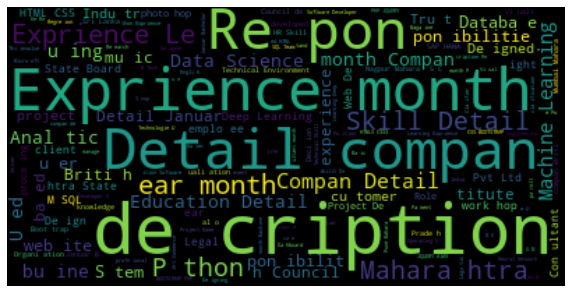

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

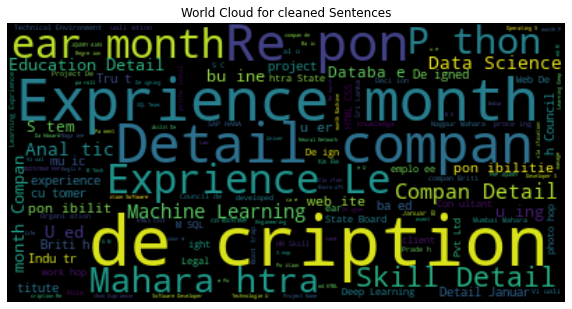

In [43]:
def WordCloudDrow(txx):
    wc = WordCloud().generate(txx)
    plt.figure(figsize=(10,10))
    plt.title("World Cloud for cleaned Sentences")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

WordCloudDrow(cleanedSentences)

In [26]:
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [27]:
df.Category.value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
18    40
16    40
10    40
3     40
22    40
6     40
1     36
7     33
19    30
14    30
11    30
4     28
9     28
2     26
17    25
5     24
21    24
0     20
Name: Category, dtype: int64

In [28]:
X = df['cleaned_resume'].values
y = df['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english',)
# word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)  # max_features ordered by term frequency across the corpus.
word_vectorizer.fit(X)
WordFeatures = word_vectorizer.transform(X)
# We have ‘WordFeatures’ as vectors and ‘requiredTarget’ and target 
print ("Feature completed .....")


# We will use 80% data for training and 20% data for validation. Let’s split the data now into training and test set.
X_train,X_test,y_train,y_test = train_test_split(WordFeatures, y, 
                                                 random_state=42, test_size=0.2,
                                                 shuffle=True, stratify = y)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(769, 6410)
(193, 6410)


In [29]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Results
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))
print('Accuracy Score:     {:.2f}'.format(accuracy_score(prediction, y_test))))

Accuracy of KNeighbors Classifier on training set: 0.98
Accuracy of KNeighbors Classifier on test set:     0.96


In [70]:
accuracy_score(prediction, y_test)

0.9585492227979274

In [30]:
# detailed classification report for each class or category
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         8
           4       0.86      1.00      0.92         6
           5       1.00      0.60      0.75         5
           6       0.73      1.00      0.84         8
           7       1.00      0.86      0.92         7
           8       0.91      0.91      0.91        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       0.86      1.00      0.92         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.

In [12]:
# Dump the file
import pickle
pickle.dump(word_vectorizer, open("Models/word_vectorizer.pkl", "wb"))


pickle.dump(clf, open("Models/model.pkl", "wb"))

In [77]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

def train(df):
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    var_mod = ['Category']
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])
        
    X = df['cleaned_resume'].values
    y = df['Category'].values
    
#     word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english',)
    word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)  
    # max_features ordered by term frequency across the corpus.
    word_vectorizer.fit(X)
    WordFeatures = word_vectorizer.transform(X)
    # We have ‘WordFeatures’ as vectors and ‘requiredTarget’ and target 
    print ("Feature completed .....")

    # We will use 80% data for training and 20% data for validation. Let’s split the data now into training and test set.
    X_train,X_test,y_train,y_test = train_test_split(WordFeatures, y, 
                                                     random_state=42, test_size=0.2,
                                                     shuffle=True, stratify = y)
    print(X_train.shape)
    print(X_test.shape)
    clf = OneVsRestClassifier(KNeighborsClassifier())
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    category_classes = list(le.classes_)
    print(len(category_classes))
    with open("category_classes.txt", 'w') as f:
        for s in category_classes:
            f.write(str(s) + '\n')
        # Results
    print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))
    print('Accuracy Score:     {:.2f}'.format(accuracy_score(prediction, y_test)))
    
    pickle.dump(word_vectorizer, open("Models/word_vectorizer.pkl", "wb"))
    pickle.dump(clf, open("Models/model.pkl", "wb"))
    
df = pd.read_csv('Data/UpdatedResumeDataSet.csv')
train(df)

vectorizer = pickle.load(open("Models/word_vectorizer.pkl", 'rb'))

model = pickle.load(open("Models/model.pkl", 'rb'))

Feature completed .....
(769, 1500)
(193, 1500)
25
Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.99
Accuracy Score:     0.99


In [31]:
df1 = pd.read_csv('Data/UpdatedResumeDataSet.csv')
df1.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [32]:
df1.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [33]:
ids = 1
test1_resume = df1['Resume'][ids]
test1_Category = df1['Category'][ids]
print(test1_resume[:5],test1_Category)


Educa Data Science


In [45]:
category_classes = list(le.classes_)
print(len(category_classes))
with open("category_classes.txt", 'w') as f:
    for s in category_classes:
        f.write(str(s) + '\n')

25


In [14]:
le.classes_

NameError: name 'le' is not defined

In [80]:
df1.shape

(962, 2)

In [34]:


with open("category_classes.txt", 'r') as f:
    classes = [line.rstrip('\n') for line in f]


print(classes)

['Advocate', 'Arts', 'Automation Testing', 'Blockchain', 'Business Analyst', 'Civil Engineer', 'Data Science', 'Database', 'DevOps Engineer', 'DotNet Developer', 'ETL Developer', 'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness', 'Java Developer', 'Mechanical Engineer', 'Network Security Engineer', 'Operations Manager', 'PMO', 'Python Developer', 'SAP Developer', 'Sales', 'Testing', 'Web Designing']


Actual Category for given Resume is  Testing
[23]
Predicted Category for given Resume is  Testing


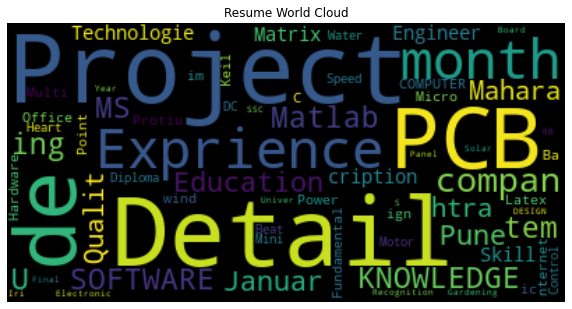

In [69]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

def WordCloudDrow(txx):
    wc = WordCloud().generate(txx)
    plt.figure(figsize=(10,10))
    plt.title("Resume World Cloud")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    wc.to_file('N.png')
    plt.show()

# tx = df['paragraphs'][1]
# tx = '\n'.join(tx)
# clean_resume = cleanResume(tx)

ids = 960
test1_resume = df1['Resume'][ids]
test1_Category = df1['Category'][ids]
tx = test1_resume
clean_resume = cleanResume(tx)
print("Actual Category for given Resume is ",test1_Category)



tx_vector = word_vectorizer.transform([clean_resume])
resume_pred_id = clf.predict(tx_vector)
print(resume_pred_id)
resume_category = category_classes[resume_pred_id[0]]

print("Predicted Category for given Resume is ",resume_category)

WordCloudDrow(clean_resume)

In [18]:
import os

In [211]:
data0 = pd.DataFrame(columns=['Category', 'Resume'])
path1 = "predTextFile"
pred_files = os.listdir(path1)

for i in pred_files:
    file_path = 'predTextFile/'+i
    resume_txt = open(file_path, 'r').read()
    category = i.split('.')[0].split('_')[-1]
    data = {'Category':category,'Resume': resume_txt}
    data0 = data0.append(data, ignore_index=True)

In [212]:
data0

,Category,Resume
0,Automation Testing,Software Tester\nROBERT SMITH\n\nPhone: (123) ...
1,Data Science,\n\nJr. Data Scientist \nConsorzio Milano ...
2,Database,\n\n \n\nSQL skills \n \nSybase \n\nOracle D...
3,DevOps Engineer,"\nBrooklyn, NY 11222\n(123) 456-7890\nstephen@..."
4,Data Science,"Jonathan Whitmore\nPhD, Data Scientist\nExperi..."
5,DotNet Developer,Luella \nGreen \n\n88605 Maximilian Mall \n\...
6,HR,\n\n \n \n \n \n \n \n \n \n \n \n \n \n \n \...
7,Mechanical Engineer,MECHANICAL ENGINEERING RESUME \n\n\n \n\n \n\n...
8,Network Security Engineer,\n\n \n\n \n\n \n\n \n\n \n \n \n \n \n \n \...
9,Web Designing,Kurt Revis\n\nkrevis@snoize.com | http://www.s...


In [216]:
data0.iloc[5,0]

'DotNet Developer'

In [113]:
dictionary = {'Category':"Hr",'Resume': "shgdsdshgdh"}

In [114]:
new_data = new_data.append(dictionary, ignore_index=True)
new_data

,Category,Resume
0,Hr,shgsdshgdh
1,Hr,shgsdshgdh
2,Hr,shgdsdshgdh


In [55]:
import time


t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
BACKUP_NAME = ("backup-" + timestamp)
print(BACKUP_NAME)

backup-Aug-12-2021_1657


In [130]:
new_data = pd.DataFrame(columns=['Category', 'Resume'])
path1 = "predTextFile"
pred_files = os.listdir(path1)

for i in pred_files:
    file_path = 'predTextFile/'+i
    resume_txt = open(file_path, 'r').read()
    category = i.split('.')[0].split('_')[1]
    data = {'Category':category,'Resume': resume_txt}
    new_data = new_data.append(data, ignore_index=True)


In [213]:
def CreateNewData():
    data0 = pd.DataFrame(columns=['Category', 'Resume'])
    path1 = "predTextFile"
    pred_files = os.listdir(path1)

    for i in pred_files:
        file_path = 'predTextFile/'+i
        resume_txt = open(file_path, 'r').read()
        category = i.split('.')[0].split('_')[-1]
        data = {'Category':category,'Resume': resume_txt}
        data0 = data0.append(data, ignore_index=True)
    t = time.localtime()
    timestamp = time.strftime('%b-%d-%Y', t)
    df_len = str(data0.shape[0])
    new_data_file = ("Data/new_data_"+df_len+'_'+ timestamp+'.csv')
    data0.to_csv(new_data_file)

    # create dummy resume dict
    d = {}
    df1 = pd.read_csv('Data/UpdatedResumeDataSet.csv')
    for cat in list(df1['Category'].unique()):
        res = df1[df1['Category']==cat].iloc[0,1]  # select first resume as dummy for certain category
        d.update({cat:res})
    new_data = pd.DataFrame(columns=['Category', 'Resume'])
    for i in range(len(data0)):
        cat = (data0.iloc[i,0])
        res = (data0.iloc[i,1])+d[cat] # add dummy resume from dict
        data = {'Category':cat,'Resume': res}
        new_data = new_data.append(data, ignore_index=True)
    new_data11 = df1.append(new_data, ignore_index=True)
    return new_data11
new_data = CreateNewData()

In [217]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

def WordCloudDrow(txx):
    wc = WordCloud().generate(txx)
    plt.figure(figsize=(10,10))
    plt.title("Resume World Cloud")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# tx = df['paragraphs'][1]
# tx = '\n'.join(tx)
# clean_resume = cleanResume(tx)

ids = 966
# test1_resume = df1['Resume'][ids]
# test1_Category = df1['Category'][ids]

test1_resume = data0.iloc[5,1]
test1_Category = data0.iloc[5,0]
tx = test1_resume  
clean_resume = cleanResume(tx)
print("Actual Category for given Resume is ",test1_Category)



tx_vector = vectorizer.transform([clean_resume])
resume_pred_id = model.predict(tx_vector)
print(resume_pred_id)
category_classes = classes
resume_category = category_classes[resume_pred_id[0]]

print("Predicted Category for given Resume is ",resume_category)

# WordCloudDrow(clean_resume)

Actual Category for given Resume is  DotNet Developer
[4]
Predicted Category for given Resume is  Business Analyst


In [194]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

def train1(df):
    df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
    var_mod = ['Category']
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])
        
    X = df['cleaned_resume'].values
    y = df['Category'].values
#     word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english',)
    word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_features=1500)  
    # max_features ordered by term frequency across the corpus.
    word_vectorizer.fit(X)
    WordFeatures = word_vectorizer.transform(X)
    # We have ‘WordFeatures’ as vectors and ‘requiredTarget’ and target 
    print ("Feature completed .....")

    # We will use 80% data for training and 20% data for validation. Let’s split the data now into training and test set.
    X_train,X_test,y_train,y_test = train_test_split(WordFeatures, y, 
                                                     random_state=42, test_size=0.2,
                                                     shuffle=True, stratify = y)
    print(X_train.shape)
    print(X_test.shape)
    clf = OneVsRestClassifier(KNeighborsClassifier())
#     clf.fit(X_train, y_train)
    clf.fit(WordFeatures, y)
    prediction = clf.predict(X_test)
    category_classes = list(le.classes_)
    print(len(category_classes))
    with open("category_classes.txt", 'w') as f:
        for s in category_classes:
            f.write(str(s) + '\n')
        # Results
    print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))
    print('Accuracy Score:     {:.2f}'.format(accuracy_score(prediction, y_test)))
    
    pickle.dump(word_vectorizer, open("Models/word_vectorizer.pkl", "wb"))
    pickle.dump(clf, open("Models/model.pkl", "wb"))


In [201]:
new_data = CreateNewData()
train1(new_data)

vectorizer = pickle.load(open("Models/word_vectorizer.pkl", 'rb'))

model = pickle.load(open("Models/model.pkl", 'rb'))

Feature completed .....
(777, 1500)
(195, 1500)
25
Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.99
Accuracy Score:     0.99


In [214]:
vectorizer = pickle.load(open("Models/word_vectorizer.pkl", 'rb'))

model = pickle.load(open("Models/model.pkl", 'rb'))

D:\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\Anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(

In [202]:
df1 = CreateNewData()

In [215]:
def cleanResume(resumeText):
    resumeText = re.sub('httpS+s*', ' ', resumeText)       # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)          # remove RT and cc
    resumeText = re.sub('#S+', '', resumeText)             # remove hashtags
    resumeText = re.sub('@S+', '  ', resumeText)           # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^x00-x7f]',r' ', resumeText)    # Replace non asciii characters
    resumeText = re.sub('s+', ' ', resumeText)             # remove extra whitespace
    return resumeText

def WordCloudDrow(txx):
    wc = WordCloud().generate(txx)
    plt.figure(figsize=(10,10))
    plt.title("Resume World Cloud")
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

ids = 966
test1_resume = df1['Resume'][ids]
test1_Category = df1['Category'][ids]
tx = test1_resume
clean_resume = cleanResume(tx)
print("Actual Category for given Resume is ",test1_Category)



tx_vector = vectorizer.transform([clean_resume])
resume_pred_id = model.predict(tx_vector)
print(resume_pred_id)
category_classes = classes
resume_category = category_classes[resume_pred_id[0]]

print("Predicted Category for given Resume is ",resume_category)

# WordCloudDrow(clean_resume)

Actual Category for given Resume is  DotNet Developer
[9]
Predicted Category for given Resume is  DotNet Developer
